<a href="https://colab.research.google.com/github/AbrarMahmud/Thesis_basic/blob/main/Transformers_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transformers

An automatic speech recognition model takes audio as input. To be able to use a transformer for ASR, we first need to convert the audio into a sequence of embedding vectors

Raw waveform is first normalized to zero mean and unit variance, which helps to standardize audio samples across different volumes (amplitudes).

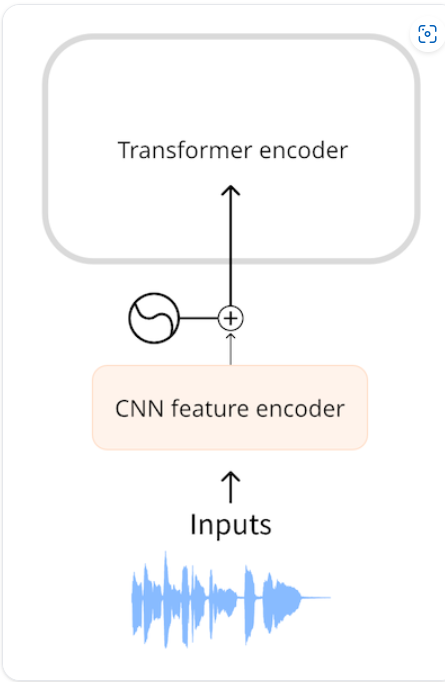

After normalizing, the sequence of audio samples is turned into an embedding using a small convolutional neural network, known as the feature encoder. Each of the convolutional layers in this network processes the input sequence, subsampling the audio to reduce the sequence length, until the final convolutional layer outputs a 512-dimensional vector with the embedding for each 25 ms of audio.**One downside of using the raw waveform as input is that they tend to have long sequence lengths.**



#Spectrogram input

raw audio waveforms are not usually the most efficient form of representing an audio input. By using a spectrogram, we get the same amount of information but in a more compressed form.

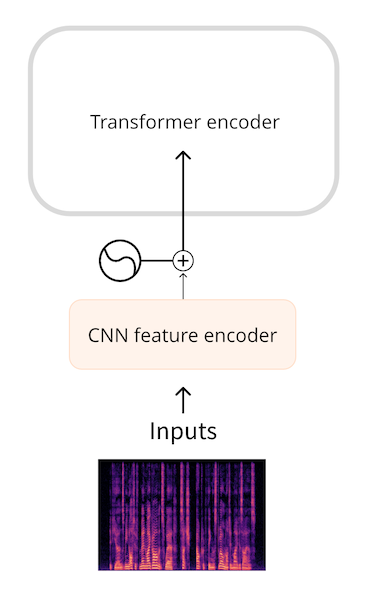

Models such as Whisper first convert the waveform into a log-mel spectrogram. Whisper always splits the audio into 30-second segments, and the log-mel spectrogram for each segment has shape (80, 3000) where 80 is the number of mel bins and 3000 is the sequence length. By converting to a log-mel spectrogram we’ve reduced the amount of input data, but more importantly, this is a much shorter sequence than the raw waveform


#Output
***Text Output:***
The goal of an automatic speech recognition model is to predict a sequence of text tokens. This is done by adding a language modeling head — typically a single linear layer — followed by a softmax on top of the transformer’s output

***Spectrogram Output:***
For models that generate audio, such as a text-to-speech (TTS) model, we’ll have to add layers that can produce an audio sequence. It’s very common to generate a spectrogram and then use an additional neural network, known as a vocoder, to turn this spectrogram into a waveform.



##Note
***To perform the different audio tasks of ASR, TTS, and so on, we can simply swap out the layers that pre-process the inputs into embeddings, and swap out the layers that post-process the predicted embeddings into outputs, while the transformer backbone stays the same.***

#**ASR**(Automatic speech recognation)

An ASR model is trained on a dataset consisting of (audio, text) pairs where the text is a human-made transcription of the audio file. Generally the dataset does not include any timing information that says which word or syllable occurs where in the audio file.


In speech, we don’t know the alignment of the audio inputs and text outputs. We know that the order the speech is spoken in is the same as the order that the text is transcribed in (the alignment is so-called monotonic), but we don’t know how the characters in the transcription line up to the audio. This is where the CTC algorithm comes in.



**Models that can be used:**

***CTC*** or Connectionist Temporal Classification is a technique that is used with encoder-only transformer models for automatic speech recognition. Examples of such models are
###**Wav2Vec2, HuBERT, M-CTC-T**


***seq2seq*** is a more powerful approach than CTC, even if the CTC model is combined with an external language model, as the seq2seq system can be trained end-to-end with the same training data and loss function, giving greater flexibility and generally superior performance.
A typical loss function for a seq2seq ASR model is the cross-entropy loss, as the final layer of the model predicts a probability distribution over the possible tokens. This is usually combined with techniques such as beam search to generate the final sequence. The metric for speech recognition is WER or word error rate, which measures how many substitutions, insertions, and deletions are necessary to turn the predicted text into the target text — the fewer, the better the score.
Examples of such models are
###**SpeechT5**

###Note on TTS(Text To Speech)
What makes TTS difficult is that it’s a one-to-many mapping.with text-to-speech the input text can be mapped to many possible speech sounds. Different speakers may choose to emphasize different parts of the sentence, for example. This makes TTS models hard to evaluate. Because of this, the L1 or MSE loss value isn’t actually very meaningful
**This is why TTS models are typically evaluated by human listeners, using a metric known as MOS or mean opinion score.**

##Concluding notes:
Any transformer can be a classifier
In a previous section you’ve seen that CTC is an efficient technique for performing automatic speech recognition using an encoder-only transformer. Such CTC models already are classifiers, predicting probabilities for class labels from a tokenizer vocabulary. We can take a CTC model and turn it into a general-purpose audio classifier by changing the labels and training it with a regular cross-entropy loss function instead of the special CTC loss.

For example, HF Transformers has a Wav2Vec2ForCTC model but also Wav2Vec2ForSequenceClassification and Wav2Vec2ForAudioFrameClassification. The only differences between the architectures of these models is the size of the classification layer and the loss function used.

In fact, any encoder-only audio transformer model can be turned into an audio classifier by adding a classification layer on top of the sequence of hidden states. (Classifiers usually don’t need a transformer decoder.)

To predict a single classification score for the entire sequence (Wav2Vec2ForSequenceClassification), the model takes the mean over the hidden-states and feeds that into the classification layer. The output is a single probability distribution.

To make a separate classification for each audio frame (Wav2Vec2ForAudioFrameClassification), the classifier is run on the sequence of hidden-states, and so the output of the classifier is a sequence too.